<!-- Badges: -->
[![Donate](https://img.shields.io/badge/Donate-PayPal-green.svg?logo=paypal&style=flat-square)](https://www.paypal.me/CamponogaraViera/100)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/QuCAI-Lab/ibm2021-open-science-prize/blob/dev/simulation.ipynb)
[![License](https://img.shields.io/github/license/QuCAI-Lab/ibm2021-open-science-prize.svg?logo=CreativeCommons&style=flat-square)](https://github.com/QuCAI-Lab/ibm2021-open-science-prize/blob/dev/LICENSE.md)
[![Contributions](https://img.shields.io/badge/contributions-welcome-orange?style=flat-square)](https://github.com/QuCAI-Lab/ibm2021-open-science-prize/pulls)
[![Maintenance](https://img.shields.io/badge/Maintained%3F-yes-green.svg)](https://github.com/QuCAI-Lab/ibm2021-open-science-prize/graphs/commit-activity)
[![Release](https://img.shields.io/github/release/QuCAI-Lab/ibm2021-open-science-prize.svg)](https://github.com/QuCAI-Lab/ibm2021-open-science-prize/releases)

<!-- Title: -->
<div align="center">
  <h1> <a href="https://research.ibm.com/blog/quantum-open-science-prize"> 2021 IBM Open Science Prize </a></h1>
  <h1> Simulating the XXX Heisenberg Model Hamiltonian for a System of Three Interacting Spin-1/2 Particles on IBM Quantum’s 7-qubit Jakarta Processor </h1>
</div>
<br> 

<div align="center">
The simulation presented here does not solve the challenge, however, the reader will find discussions on different approaches.
</div>
<br> 

<!-- Author: -->
<div align="center">
<b>Developers: ¹Lucas Camponogara Viera</b>
<br>
<b><a target="_blank" href="https://en.ntnu.edu.tw/">¹National Taiwan Normal University - NTNU, Taipei, Taiwan</a></b>.
</div>

<br>

[comment]: <> ()
<table class="tfo-notebook-buttons" align="head">
  <td>
    <a target="_blank" href="https://github.com/QuCAI-Lab/ibm2021-open-science-prize"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
</table>

<center><a href="https://github.com/QuCAI-Lab/ibm2021-open-science-prize"><b>View on GitHub</b></a></center>

    


In [1]:
%autosave 30

Autosaving every 30 seconds


---
In this jupyter notebook, the reader will find classical and quantum simulations for the Trotter evolution of the quantum state |110> to time t=pi under the XXX Heisenberg model Hamiltonian for a system of three interacting spin-1/2 particles. The code implementation of the quantum simulation using qubits 5, 3, and 1 from the IBM Quantum 7-qubit Jakarta processor is the one provided by IBM without any modification. This work is not a final solution to the posed IBM challenge, however, the reader may use it as a guide.

---

# &nbsp; <a href="https://creativecommons.org/licenses/by/4.0/"><img valign="middle" src="https://img.icons8.com/copyright" width="50"></a> License

In [2]:
#@title Copyright 2022.
# This code is part of heisenberg-model.
#
# (C) Copyright NTNU QuCAI-Lab, 2022.
#
# This code is licensed under the Creative Commons Zero v1.0 Universal License. 
# You may obtain a copy of the License at https://github.com/QuCAI-Lab/ibm2021-open-science-prize/blob/dev/LICENSE.md.

# &nbsp; <a href="https://colab.research.google.com/"><img valign="middle" src="https://www.tensorflow.org/images/colab_logo_32px.png" width="50"></a> Pip Install

* **Run the following cells only if you are running this Jupyter notebook outside the [heisenberg_model environment](https://github.com/QuCAI-Lab/ibm2021-open-science-prize/blob/dev/environment.yml).**

Installing `Qiskit`, `NumPy`, and `pylatexenc`.

In [3]:
'''
# Installing a non-default library

!python3 -m pip install <library_name>

# Alternative 

!apt-get -qq install -y <library_name> && python3 -m pip install -U <library_name> 

# Upgrading an installed library

!python3 -m pip install -U --upgrade <library_name> 
'''

'\n# Installing a non-default library\n\n!python3 -m pip install <library_name>\n\n# Alternative \n\n!apt-get -qq install -y <library_name> && python3 -m pip install -U <library_name> \n\n# Upgrading an installed library\n\n!python3 -m pip install -U --upgrade <library_name> \n'

In [4]:
try:
  import pip, pkg_resources
  pkg_resources.require("pip>=21.1.3") # Latest version: 22.0.4
  print(pip.__version__)
except:
  import subprocess, sys
  cmd = "python3 -m pip install --upgrade pip"
  process = subprocess.Popen(cmd,shell=True,bufsize=1,stdout=subprocess.PIPE,
                             stderr=subprocess.STDOUT,encoding='utf-8',errors='replace') 
  while True:
    out = process.stdout.readline()
    if out == '' and process.poll() is not None:
      break
    if out:
      print(out.strip(), flush=False)
      sys.stdout.flush()
  #raise

22.0.4


In [5]:
#!python3 -m pip install pip==version_number # To downgrade pip.
!pip --version

pip 22.0.4 from C:\Users\Qulab\.conda\envs\heisenberg-model\lib\site-packages\pip (python 3.7)



**NumPy:**

In [ ]:
!python3 -m pip install numpy==1.20.1

**Qiskit:**

In [ ]:
!python3 -m pip install qiskit==0.35.0

**pylatexenc**:

In [ ]:
# The 'pylatexenc' library is required to use 'MatplotlibDrawer'.

!python -m pip install pylatexenc==2.10

# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/python" width="45" hspace="0px" vspace="0px"></a> Requirements

In [6]:
import sys
import IPython
import qiskit
import numpy as np 
import matplotlib

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
### If using Google Colab, one needs to restart Colab Runtime after pip install. ###

try:
  import pkg_resources, watermark
  pkg_resources.require("watermark>=2.3.0") # Force watermark version.
  print(watermark.__version__)
except:
  import subprocess, sys
  if "google.colab" in sys.modules:
    cmd = "python3 -m pip install --upgrade watermark" # Upgrade watermak.

    process = subprocess.Popen(cmd,shell=True,bufsize=1,stdout=subprocess.PIPE, \
                              stderr=subprocess.STDOUT,encoding='utf-8',errors='replace') 
    while True: 
      out = process.stdout.readline() # The first line of the file.
      if out == '' and process.poll() is not None: # Run the loop until condition is True.
        break 
      if out:
        print(out.strip(), flush=False) # Removes leading and trailing empty spaces. 
        sys.stdout.flush()
    #raise # To raise the import error. Upgrade will be successful regardless.

2.3.0


In [8]:
# If you get hit by the error "No module named watermark", run this cell twice!

#%load_ext watermark
%reload_ext watermark
%watermark -a 'LucasCamponogaraViera' -gu 'QuCAI-Lab' -ws 'https://github.com/QuCAI-Lab/ibm2021-open-science-prize' -w -u -d -v -m -iv

Author: LucasCamponogaraViera

Github username: QuCAI-Lab

Website: https://github.com/QuCAI-Lab/ibm2021-open-science-prize

Last updated: 2022-04-27

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.32.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 6
Architecture: 64bit

qiskit    : 0.35.0
pip       : 22.0.4
watermark : 2.3.0
matplotlib: 3.5.1
IPython   : 7.32.0
numpy     : 1.20.1
sys       : 3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit (AMD64)]

Watermark: 2.3.0



In [9]:
print(IPython.sys_info())

{'commit_hash': 'e84cee846',
 'commit_source': 'installation',
 'default_encoding': 'cp950',
 'ipython_path': 'C:\\Users\\Qulab\\.conda\\envs\\heisenberg-model\\lib\\site-packages\\IPython',
 'ipython_version': '7.32.0',
 'os_name': 'nt',
 'platform': 'Windows-10-10.0.19041-SP0',
 'sys_executable': 'C:\\Users\\Qulab\\.conda\\envs\\heisenberg-model\\python.exe',
 'sys_platform': 'win32',
 'sys_version': '3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit '
                '(AMD64)]'}


# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/bot" width="45" hspace="0px" vspace="0px"></a> Classical Simulation

In [13]:
from qiskit.quantum_info import state_fidelity
from qiskit.opflow import Zero, One, I, X, Y, Z
import matplotlib.pyplot as plt
import scipy
from scipy.linalg import expm

plt.rcParams.update({'font.size': 11})  # enlarge matplotlib fonts

**XXX Heisenberg Hamiltonian Operator:**

\begin{eqnarray}
H_{heis3} &=& \sigma_x^{(0)}\otimes\sigma_x^{(1)}\otimes I^{(2)} + I^{(0)} \otimes\sigma_x^{(1)}\otimes\sigma_x^{(2)} + \sigma_y^{(0)}\otimes\sigma_y^{(1)}\otimes I^{(2)} + I^{(0)} \otimes \sigma_y^{(1)}\otimes\sigma_y^{(2)} + I^{(0)} \otimes\sigma_z^{(0)}\otimes\sigma_z^{(1)} + I^{(0)}\otimes\sigma_z^{(1)}\otimes\sigma_z^{(2)}.
\end{eqnarray}

\begin{align}
H_{heis3} = X\otimes X\otimes I + I\otimes X\otimes X + Y\otimes Y\otimes I + I\otimes Y\otimes Y + Z\otimes Z\otimes I + I\otimes Z\otimes Z.
\end{align}

- See the `supplementary.ipynb` material for derivations.

In [14]:
def hamiltonian_operator():
    '''
    Function to compute the XXX Heisenberg Hamiltonian for a system of three interacting spin-1/2 particles in a 1D-chain.
    
    The parentheses between sums are required to preserve the order of operations.
    Carrot symbol ^ denotes tensor product between matrices.
    Plus sign + denotes addition operation between matrices.
          
    Returns:
      - h_heis3 (qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp): the matrix representation of the XXX Heisemberg Hamiltonian operator.
    '''
    XXs = (I^X^X) + (X^X^I)
    YYs = (I^Y^Y) + (Y^Y^I)
    ZZs = (I^Z^Z) + (Z^Z^I)
    h_heis3 = XXs + YYs + ZZs
    return h_heis3

print(hamiltonian_operator())

1.0 * IXX
+ 1.0 * XXI
+ 1.0 * IYY
+ 1.0 * YYI
+ 1.0 * IZZ
+ 1.0 * ZZI


**Unitary Evolution Operator:**

\begin{eqnarray}
\hat{U}(t) = e^{-i\hat{H}t / \hbar}.
\end{eqnarray}

\begin{eqnarray}
U_{heis3}=e^{-iH_{heis3}t / \hbar}.
\end{eqnarray}

- See the `supplementary.ipynb` material for derivations.

In [ ]:
def evolution_operator(time, hamiltonian):
    '''
    Function to compute the corresponding Unitary Evolution Operator of the XXX Hamiltonian.
    
    In this function, the reduced Planck's constant "hbar" is set to one.
    
    Args:
      - time (float): an instant of time.
      - hamiltonian (function): a function that returns the matrix representation of the Hamiltonian operator of interest.
    
    Returns:
      - unitary_evolution (qiskit.opflow.evolutions.evolved_op.EvolvedOp): the matrix corresponding to the Evolution operator at a given time.
    '''
    unitary_evolution = (float(time) * hamiltonian).exp_i()
    return unitary_evolution

evolution_operator(np.pi, hamiltonian_operator()) # Evolution operator at time t=pi.

EvolvedOp(PauliSumOp(SparsePauliOp(['IXX', 'XXI', 'IYY', 'YYI', 'IZZ', 'ZZI'],
              coeffs=[3.14159265+0.j, 3.14159265+0.j, 3.14159265+0.j, 3.14159265+0.j,
 3.14159265+0.j, 3.14159265+0.j]), coeff=1), coeff=1.0)

**Probability of state $|110\rangle$ over time $t=\pi$ under $H_{heis3}$:**

\begin{eqnarray}|
P_t(|o_j\rangle) &=& |\langle o_j | \hat{U}(t) |\psi(0)\rangle|^2 \\
&=& |\langle o_j |\psi(t)\rangle|^2.
\end{eqnarray}

When $|o_j\rangle=|\psi(0)\rangle \implies P_t(|o_j\rangle) = \langle \psi(0) |\hat{U}(t)|\psi(0)\rangle = \langle \hat{U}(t) \rangle$ according to $\langle \psi(0) |U^{\dagger}(t)\hat{\mathcal{O}}\hat{U}(t)|\psi(0)\rangle$, for $=\hat{\mathcal{O}}=\hat{U}(t)$.

\begin{eqnarray}
P_{t=\pi}(|110\rangle) &=& |\langle 110 | U_{heis3}(t=\pi) |110\rangle|^2 \\
&=& |\langle 110 |e^{-i\pi H_{heis3}/ \hbar} |110\rangle|^2 \\
&=& |\langle U_{heis3} \rangle|^2.
\end{eqnarray}

- See the `supplementary.ipynb` material for derivations.

In [ ]:
def probability(measured_state, prepared_state, time_window, unitary_evolution, hamiltonian, *args):
    '''    
    Function that computes the probability of measuring a given reference state of a quantum system evolving over time.
    
    When the reference_state is equal to the prepared_state, this function computes the modulus squared of the expectation value of a given operator over a given time window.
    The tilde symbol ~ denotes de dagger operation and returns the adjoint (conjugate transpose) of a vector. 
    The at sign @ is short hand for matrix multiplication.
    The (...).eval() method from qiskit.opflow returns the inner product.

    Args:
      - measured_state (qiskit.opflow.state_fns.dict_state_fn.DictStateFn): a column (ket) vector representing the quantum state to be measured.
      - prepared_state (qiskit.opflow.state_fns.dict_state_fn.DictStateFn): a column (ket) vector representing the state in which the quantum system was prepared.
      - time_window (numpy.ndarray): array of time instants of the state evolution.
      - unitary_evolution (function): a function that returns the Evolution operator with type=qiskit.opflow.evolutions.evolved_op.EvolvedOp.
      - hamiltonian (qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp): the Hamiltonian operator.
      - *args (int): the number of Trotter steps, if applied.

    Returns:
      - probability (list): a list with the individual probabilities of finding the quantum system in a given reference state at a given time instant.
    '''
    probability = [np.abs((~measured_state @ unitary_evolution(t, hamiltonian, *args) @ prepared_state).eval())**2 for t in time_window]
    return probability

**Dynamics (evolution) of the state $|110\rangle$ under $h_{heis3}$:** 

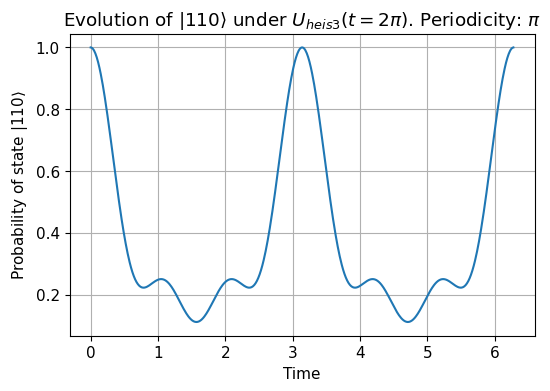

In [ ]:
def plot(xlabel, ylabel, title, legends=True, size=False, **kwargs):
    '''
    Function for plot visualization.
    
    Args:
      - xlabel (str): the X-axis label.
      - ylabel (str): the Y-axis label.
      - title (str): the title of the plot.
      - legends (bool): boolean value to determine if labels are applied. Default is True.
      - size (bool): boolean value to determine if image size, resolution and plot are applied. Default is False.
    
    **kwargs
      - x (numpy.ndarray): set of X-axis values.
      - y (list): set of Y-axis values.
      - w (int): width of the plot figure in unit inches.
      - h (int): height of the plot figure in unit inches.
      - dpi (int): resolution in dots per inch.
    '''
    if kwargs:
        x, y, w, h, dpi = kwargs.values()
    if size:
        plt.figure(figsize = (w,h), dpi = dpi)
        plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legends:
        plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.title(title)
    plt.grid()
    plt.show()

#time_window=np.linspace(0, 3*np.pi, 100)
time_window=np.arange(start=0, stop=2*np.pi, step=0.01)
prepared_state=One^One^Zero
measured_state=prepared_state
probs_heis3=probability(measured_state, prepared_state, time_window, evolution_operator, hamiltonian_operator())

plot(xlabel='Time', ylabel=r'Probability of state $|110\rangle$', \
     title=r'Evolution of $|110\rangle$ under $U_{heis3}(t=2\pi)$. Periodicity: $\pi$', legends=False, size=True, \
     x=time_window, y=probs_heis3, w=6, h=4, dpi=100)

**Trotterization:**

Consider the following decomposition for $H_{heis3}$:

\begin{align}
H_{heis3} = H_a^{(0,1)} + H_b^{(1,2)},
\end{align}
where
\begin{align}
H_a^{(0,1)}  =\big(X^{(0)} \otimes X^{(1)} + Y^{(0)}\otimes Y^{(1)} + Z^{(0)}\otimes Z^{(1)}\big)\otimes I^{(2)}, \\
H_b^{(1,2)} =I^{(0)}\otimes \big(X^{(1)}\otimes X^{(2)} +  Y^{(1)}\otimes Y^{(2)} +  Z^{(1)}\otimes Z^{(2)}\big),
\end{align}

with $[H_a^{(0,1)},H_b^{(1,2)}]\ne\mathbb{O}$.

The unitary evolution operator according to the Trotter-Suzuki decomposition thus becomes ($\hbar\equiv1$):

\begin{align}
U_{Trotter}(t) &= e^{-itH_{heis3}} = e^{-it\Big(H_a^{(0,1)} + H_b^{(1,2)}\Big)} = \lim_{N\rightarrow\infty}\Big(e^{-it H_a/N}e^{-it H_b /N}\Big)^{N} \\
&= \lim_{N\rightarrow\infty}\left(\Big(e^{-it X\otimes X/N}e^{-it Y\otimes Y/N}e^{-it Z\otimes Z/N}\otimes I\Big)\Big(I\otimes e^{-it X\otimes X/N}e^{-it Y\otimes Y/N}e^{-it Z \otimes Z/N}\Big)\right)^{N}.
\end{align}

**NumPy and qiskit.opflow implementations of Trotterization:**

In [ ]:
sigma0 = np.array([[1,0],[0,1]])
sigma1 = np.array([[0,1],[1,0]])
sigma2 = np.array([[0,-1j],[1j,0]])
sigma3 = np.array([[1,0],[0,-1]])

def ham_decomposition_qiskit():
    '''
    Function that decomposes the XXX Heisenberg Hamiltonian using qiskit.opflow.
    
    Returns:
      - h_a, h_b (tuple): the reduced Hamiltonians of the decomposition, each of type=qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp.
    '''
    global ham_qiskit
    ham_qiskit = (X^X) + (Y^Y) + (Z^Z)
    h_a = ham_qiskit^I
    h_b = I^ham_qiskit
    return h_a, h_b

def ham_decomposition_num():
    '''
    Function that decomposes the XXX Heisenberg Hamiltonian using NumPy.
    
    Returns:
      - h_a, h_b (tuple): the reduced Hamiltonians of the decomposition, each of type=numpy.ndarray.
    '''
    global ham_num
    ham_num = np.kron(sigma1, sigma1) + np.kron(sigma2, sigma2) + np.kron(sigma3, sigma3)
    h_a = np.kron(ham_num, sigma0)
    h_b = np.kron(sigma0, ham_num)
    return h_a, h_b

def trotter_evolution_qiskit(time, hamiltonian, trotter_steps):
    '''
    Function that computes the Trotterization of the Evolution operator given the XXX Heisenberg Hamiltonian using qiskit.opflow.
    
    Returns:
      - power (qiskit.opflow.list_ops.composed_op.ComposedOp): the Evolution operator to the power of trotter_steps.
    '''
    h_a, h_b = hamiltonian
    evolution_operator_a=(float(time/trotter_steps) * h_a).exp_i()
    evolution_operator_b=(float(time/trotter_steps) * h_b).exp_i()
    evolution_operator=evolution_operator_a@evolution_operator_b
    power=evolution_operator.power(trotter_steps)
    return power

def trotter_evolution_num(time, hamiltonian, trotter_steps):
    '''
    Function that computes the Trotterization of the Evolution Operator given the XXX Heisenberg Hamiltonian using NumPy.
    
    Returns:
      - power (numpy.ndarray): the matrix representing the Evolution operator to the power of trotter_steps.
    '''
    h_a, h_b = hamiltonian
    evolution_operator_a=expm(-1j*float(time/trotter_steps)*h_a)
    evolution_operator_b=expm(-1j*float(time/trotter_steps)*h_b)
    evolution_operator=np.dot(evolution_operator_a, evolution_operator_b)
    power=np.linalg.matrix_power(evolution_operator, trotter_steps)
    return power 

a,b=ham_decomposition_qiskit(),ham_decomposition_num()

In [ ]:
#n=3
#X.power(n) == X**n # >>> True

In [ ]:
#np.dot(sigma1,sigma2) == (X@Y).to_matrix() # >>> True

In [ ]:
#np.kron(sigma1,sigma2) == (X^Y).to_matrix() # >>> True

In [ ]:
#ham_num == ham_qiskit.to_matrix() # >>> True

In [ ]:
#np.kron(ham_num, sigma0)==(ham_qiskit^I).to_matrix() # >>> True

In [ ]:
#np.kron(sigma0, ham_num)==(I^ham_qiskit).to_matrix() # >>> True

In [ ]:
#expm(-1j*np.pi*(np.kron(ham_num, sigma0))) == (np.pi * (ham_qiskit^I)).exp_i().to_matrix() #>>> True

In [ ]:
#expm(-1j*np.pi*(np.kron(sigma0, ham_num))) == (np.pi * (I^ham_qiskit)).exp_i().to_matrix() #>>> True

In [ ]:
# Some values may be slightly different.

trotter_evolution_num(np.pi, ham_decomposition_num(), 1)[1][1], \
trotter_evolution_qiskit(np.pi, ham_decomposition_qiskit(), 1).to_matrix()[1][1]

((0.9999999999999991+6.752467318534805e-17j),
 (0.9999999999999991+6.752467318534806e-17j))

In [ ]:
# After the values are rounded both implementations match, as they should.

trotter_evolution_num(np.pi, ham_decomposition_num(), 1).round() == \
trotter_evolution_qiskit(np.pi, ham_decomposition_qiskit(), 1).to_matrix().round()

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

**State Fidelity:** 

The fidelity between two mixed density operators (matrices) $\rho$ and $\sigma$ is:

\begin{align}
F(\rho,\sigma) = \left(tr \sqrt{\sqrt{\rho} \sigma \sqrt{\rho}}\right)^2,
\end{align}

with $\rho= |\psi_{\rho}\rangle \langle \psi_{\rho}|$ and $\sigma=|\psi_{\sigma}\rangle \langle \psi_{\sigma}|$.

If one of the states is a pure state ($\rho=|\psi_{\rho}\rangle \langle \psi_{\rho}|$), it reduces to the fidelity between a pure and a mixed state:

\begin{align}
F(\sigma, |\psi\rangle) = \langle\psi_{\rho}|\sigma|\psi_{\rho}\rangle = \sum_{j,k=0}^{d-1}\psi_{j}^{*}\sigma_{j,k}\psi_{k}.
\end{align}

If both states are pure states, then

\begin{align}
F(\rho, \sigma) = |\langle\psi_{\rho}|\psi_{\sigma}\rangle|^2.
\end{align}

**Computing State Fidelity for pure states with NumPy:** 

In [ ]:
def state_fidelity_num(measured_state, prepared_state, time_window, unitary_evolution, hamiltonian, trotter_steps):
    '''    
    Function that computes the probability of measuring a given reference state of a quantum system evolving over time.
    
    If the reference_state is equal to the prepared_state, this function computes the modulus squared of the expectation value of a given operator over a given time window.

    Args:
      - measured_state (numpy.ndarray): a column (ket) vector representing the quantum state to be measured.
      - prepared_state (numpy.ndarray): a column (ket) vector representing the state in which the quantum system was prepared.
      - time_window (numpy.ndarray): array of time instants of the state evolution.
      - unitary_evolution (function): a function that returns the matrix representation (numpy.ndarray) of the Trottered Evolution operator.
      - hamiltonian (tuple): the reduced Hamiltonians from the decomposition, each of type=numpy.ndarray.
      - trotter_steps (int): the number of Trotter steps.

    Returns:
      - probability_array (numpy.ndarray): array with the individual probabilities of finding the quantum system in a given reference state at a given time instant.
    '''
    probability_array=np.zeros(len(time_window))
    adjoint = measured_state.conj().T
    for i in range(len(time_window)):
        unitary=unitary_evolution(time_window[i],hamiltonian,trotter_steps)
        evolved_state=np.dot(unitary, prepared_state)
        inner_product = np.dot(adjoint,evolved_state)
        probability_array[i] = np.abs(inner_product)**2   
        
    return probability_array

**Dynamics (evolution) of State Fidelity for the state $|110\rangle$ under $U_{Trotter}(t=\pi)$:** 

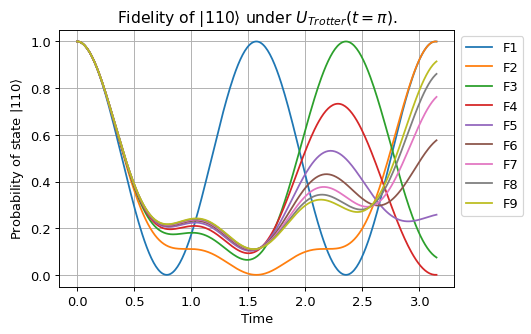

In [ ]:
# Plot for Trotterization implemented with NumPy.

time_window=np.arange(start=0, stop=np.pi+0.01, step=0.01)
measured_state=(One^One^Zero).to_matrix()
prepared_state=measured_state
fidelity=[]
plt.figure(figsize = (6,4), dpi = 85)
for i in range(9):
    fids=state_fidelity_num(measured_state, prepared_state, time_window, trotter_evolution_num, \
                          ham_decomposition_num(), trotter_steps=i+1)
    fidelity.append(fids[len(time_window)-1])
    plt.plot(time_window, fids, label = f"F{i+1}")

plot('Time', r'Probability of state $|110\rangle$',r'Fidelity of $|110\rangle$ under $U_{Trotter}(t=\pi)$.',True,False)

In [ ]:
for value in fidelity:
    print(f'F{fidelity.index(value)+1}={value}')  

F1=0.9997172927505018
F2=0.9997173027412787
F3=0.07441607773249213
F4=0.00015902844790257662
F5=0.25775363032243487
F6=0.5765991261868874
F7=0.7625355067869187
F8=0.8611366833624894
F9=0.91466455372391


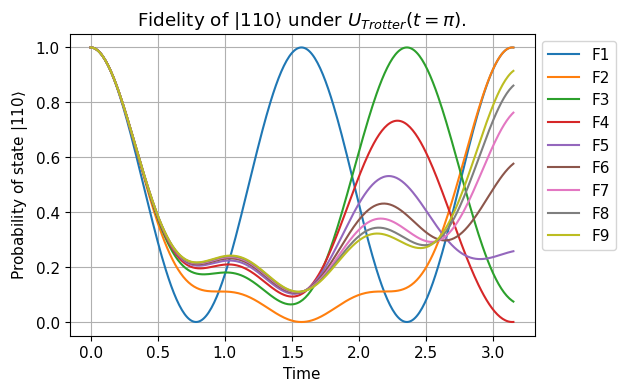

In [ ]:
# Plot for Trotterization implemented with qiskit.opflow. 
# It works, but it takes longer to compute! 

time_window=np.arange(start=0, stop=np.pi+0.01, step=0.01)
measured_state=(One^One^Zero)
prepared_state=measured_state
fidelity=[]
plt.figure(figsize = (6,4), dpi = 100)
for i in range(9):
    fids=probability(measured_state, prepared_state, time_window, trotter_evolution_qiskit, \
                      ham_decomposition_qiskit(), i+1)
    fidelity.append(fids[len(time_window)-1])
    plt.plot(time_window, fids, label = f"F{i+1}")
plot('Time', r'Probability of state $|110\rangle$', r'Fidelity of $|110\rangle$ under $U_{Trotter}(t=\pi)$.',True, False)

In [ ]:
for value in fidelity:
    print(f'F{fidelity.index(value)+1}={value}')  

F1=0.9997172927505018
F2=0.9997173027412785
F3=0.07441607773249213
F4=0.00015902844790257657
F5=0.25775363032243465
F6=0.5765991261868874
F7=0.7625355067869187
F8=0.8611366833624895
F9=0.91466455372391


The classical simulation reveals that state fidelity does not increase with increasing number of trotter steps, since:

\begin{eqnarray}
F_{4}(t=\pi)<F_{3}(t=\pi)<F_{2}(t=\pi).
\end{eqnarray}

Furthermore, the classical simulation suggests a minimum number of $N_{min}=6$ trotter steps ($F_6=0.576599...$) to comply with the competition judging criteria for $N\geq 4$.

# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/physics" width="45" hspace="0px" vspace="0px"></a> Quantum Simulation

**Dependencies:**

In [31]:
# Importing standard Qiskit modules
from qiskit import QuantumCircuit, QuantumRegister, IBMQ, execute, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Parameter
from qiskit.opflow import Zero, One

# Import state tomography modules
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity

import numpy as np

In [3]:
import qiskit.tools.jupyter
%qiskit_version_table

**Reading personal token from external file and loading IBMQ Account data:**

In [2]:
%run ibm_token.py # Magic command. use `%run?` for help or read the documentation at https://ipython.readthedocs.io/en/stable/interactive/magics.html
#%run?

In [6]:
# load IBMQ Account data

IBMQ.save_account(TOKEN, overwrite=True) 
provider = IBMQ.load_account()

**Connecting to IBM provider:**

In [7]:
# Get the Real Jakarta backend for experiment:

provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')

In [8]:
properties = jakarta.properties()
properties

In [ ]:
backend_overview()

ibmq_jakarta                 ibmq_manila                  ibmq_quito
------------                 -----------                  ----------
Num. Qubits:  7              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 1897           Pending Jobs: 6              Pending Jobs: 7
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      141.4          Avg. T1:      135.8          Avg. T1:      103.3
Avg. T2:      43.7           Avg. T2:      55.0           Avg. T2:      105.1



ibmq_belem                   ibmq_lima                    ibmq_bogota
----------                   ---------                    -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 7              Pending Jobs: 0              Pending Jobs: 21
Least busy:   False          Least busy:   True           Least busy:   False
Operational:  True           Oper

In [ ]:
backend_monitor(jakarta)

ibmq_jakarta
Configuration
-------------
    n_qubits: 7
    operational: True
    status_msg: dedicated
    pending_jobs: 1896
    backend_version: 1.0.33
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    meas_kernels: ['hw_qmfk']
    dt: 0.2222222222222222
    rep_times: [1000.0]
    conditional_latency: []
    clops: 2438
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 5], [4, 5], [5, 3], [5, 4], [5, 6], [6, 5]]
    n_registers: 1
    qubit_lo_range: [[4.736543849967877, 5.736543849967877], [4.514439979550949, 5.514439979550949], [4.608541836310971, 5.608541836310971], [4.67814547492645, 5.67814547492645], [4.713028496681162, 5.713028496681162], [4.563258609964804, 5.563258609964804], [4.800705834279577, 5.800705834279577]]
    n_uchannels: 12
    conditional: False
    memory: True
    parametric_pulses: ['gaussian', 'gaussian_square', 'drag', 'constant']
    allow_object_storage: True
    sample_name: family: F

**Defining Jakarta-based quantum simulators:**

In [9]:
# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim_noise_free = QasmSimulator()

## Trotterization

**The chosen Trotterization:**

\begin{align}
U_{N=8} (\pi)\approx \left(\Big(e^{-i\pi X\otimes X/8}e^{-i\pi Y\otimes Y/8}e^{-i\pi Z\otimes Z/8}\otimes I\Big)\Big(I\otimes e^{-i\pi X\otimes X/8}e^{-i\pi Y\otimes Y/8}e^{-i\pi Z \otimes Z/8}\Big)\right)^{8}.
\end{align}

- See the `supplementary.ipynb` material for derivations.

**Decomposition of $U_{\text{heis3}}(t)$:**

In [13]:
# Parameterize variable t to be evaluated at t=pi later
t = Parameter('t')

**The $e^{-itXX}$ gate:**

In [14]:
# Build a subcircuit for XX(t) two-qubit gate
XX_qr = QuantumRegister(2)
XX_qc = QuantumCircuit(XX_qr, name='XX')

XX_qc.ry(np.pi/2,[0,1])
XX_qc.cnot(0,1)
XX_qc.rz(2 * t, 1)
XX_qc.cnot(0,1)
XX_qc.ry(-np.pi/2,[0,1])

# Convert custom quantum circuit into a gate
XX = XX_qc.to_instruction()

In [15]:
XX_qc.draw()

┌─────────┐                     ┌──────────┐
q1_0: ┤ Ry(π/2) ├──■───────────────■──┤ Ry(-π/2) ├
      ├─────────┤┌─┴─┐┌─────────┐┌─┴─┐├──────────┤
q1_1: ┤ Ry(π/2) ├┤ X ├┤ Rz(2*t) ├┤ X ├┤ Ry(-π/2) ├
      └─────────┘└───┘└─────────┘└───┘└──────────┘

From the fact that $H|0\rangle = R_y(\pi/2)|0\rangle = |+\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$, one equivalent quantum circuit is:

In [16]:
# Equivalent circuit:

qc = QuantumCircuit(2)
qc.h([0,1])
qc.cx(0, 1)
qc.rz(2 * t, 1)
qc.cx(0, 1)
qc.h([0,1])
qc.draw()

┌───┐                     ┌───┐
q_0: ┤ H ├──■───────────────■──┤ H ├
     ├───┤┌─┴─┐┌─────────┐┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ Rz(2*t) ├┤ X ├┤ H ├
     └───┘└───┘└─────────┘└───┘└───┘

**The $e^{-itYY}$ gate:**

In [17]:
# Build a subcircuit for YY(t) two-qubit gate
YY_qr = QuantumRegister(2)
YY_qc = QuantumCircuit(YY_qr, name='YY')

YY_qc.rx(np.pi/2,[0,1])
YY_qc.cnot(0,1)
YY_qc.rz(2 * t, 1)
YY_qc.cnot(0,1)
YY_qc.rx(-np.pi/2,[0,1])

# Convert custom quantum circuit into a gate
YY = YY_qc.to_instruction()

In [18]:
YY_qc.draw()

┌─────────┐                     ┌──────────┐
q2_0: ┤ Rx(π/2) ├──■───────────────■──┤ Rx(-π/2) ├
      ├─────────┤┌─┴─┐┌─────────┐┌─┴─┐├──────────┤
q2_1: ┤ Rx(π/2) ├┤ X ├┤ Rz(2*t) ├┤ X ├┤ Rx(-π/2) ├
      └─────────┘└───┘└─────────┘└───┘└──────────┘

From the fact that $ SH|0\rangle = R_x(\pi/2)|0\rangle) = \frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle) $, one equivalent quantum circuit is:

In [19]:
# Equivalent circuit:

qc = QuantumCircuit(2)
qc.sdg([0,1])
qc.h([0,1])
qc.cx(0, 1)
qc.rz(2 * t, 1)
qc.cx(0, 1)
qc.h([0,1])
qc.s([0,1])
qc.draw()

┌─────┐┌───┐                     ┌───┐┌───┐
q_0: ┤ Sdg ├┤ H ├──■───────────────■──┤ H ├┤ S ├
     ├─────┤├───┤┌─┴─┐┌─────────┐┌─┴─┐├───┤├───┤
q_1: ┤ Sdg ├┤ H ├┤ X ├┤ Rz(2*t) ├┤ X ├┤ H ├┤ S ├
     └─────┘└───┘└───┘└─────────┘└───┘└───┘└───┘

**The $e^{-itZZ}$ gate:**

In [20]:
# Build a subcircuit for ZZ(t) two-qubit gate
ZZ_qr = QuantumRegister(2)
ZZ_qc = QuantumCircuit(ZZ_qr, name='ZZ')

ZZ_qc.cnot(0,1)
ZZ_qc.rz(2 * t, 1)
ZZ_qc.cnot(0,1)

# Convert custom quantum circuit into a gate
ZZ = ZZ_qc.to_instruction()

In [21]:
#ZZ_qc.draw(output='mpl') # Requires 'pip install pylatexenc' library to use 'MatplotlibDrawer'.
ZZ_qc.draw()

q3_0: ──■───────────────■──
      ┌─┴─┐┌─────────┐┌─┴─┐
q3_1: ┤ X ├┤ Rz(2*t) ├┤ X ├
      └───┘└─────────┘└───┘

**The full quantum circuit for one Trotter step:**

In [22]:
# Combine subcircuits into a single multiqubit gate representing a single trotter step
num_qubits = 3

Trot_qr = QuantumRegister(num_qubits)
Trot_qc = QuantumCircuit(Trot_qr, name='Trot')

for i in range(0, num_qubits - 1):
    Trot_qc.append(ZZ, [Trot_qr[i], Trot_qr[i+1]])
    Trot_qc.append(YY, [Trot_qr[i], Trot_qr[i+1]])
    Trot_qc.append(XX, [Trot_qr[i], Trot_qr[i+1]])

# Convert custom quantum circuit into a gate
Trot_gate = Trot_qc.to_instruction()

In [23]:
Trot_qc.draw()

┌────────┐┌────────┐┌────────┐                              
q4_0: ┤0       ├┤0       ├┤0       ├──────────────────────────────
      │  ZZ(t) ││  YY(t) ││  XX(t) │┌────────┐┌────────┐┌────────┐
q4_1: ┤1       ├┤1       ├┤1       ├┤0       ├┤0       ├┤0       ├
      └────────┘└────────┘└────────┘│  ZZ(t) ││  YY(t) ││  XX(t) │
q4_2: ──────────────────────────────┤1       ├┤1       ├┤1       ├
                                    └────────┘└────────┘└────────┘

In [24]:
Trot_qc.decompose().draw()

┌─────────┐                     ┌──────────┐»
q4_0: ──■───────────────■──┤ Rx(π/2) ├──■───────────────■──┤ Rx(-π/2) ├»
      ┌─┴─┐┌─────────┐┌─┴─┐├─────────┤┌─┴─┐┌─────────┐┌─┴─┐├──────────┤»
q4_1: ┤ X ├┤ Rz(2*t) ├┤ X ├┤ Rx(π/2) ├┤ X ├┤ Rz(2*t) ├┤ X ├┤ Rx(-π/2) ├»
      └───┘└─────────┘└───┘└─────────┘└───┘└─────────┘└───┘└──────────┘»
q4_2: ─────────────────────────────────────────────────────────────────»
                                                                       »
«      ┌─────────┐                     ┌──────────┐                     »
«q4_0: ┤ Ry(π/2) ├──■───────────────■──┤ Ry(-π/2) ├─────────────────────»
«      ├─────────┤┌─┴─┐┌─────────┐┌─┴─┐├──────────┤                     »
«q4_1: ┤ Ry(π/2) ├┤ X ├┤ Rz(2*t) ├┤ X ├┤ Ry(-π/2) ├──■───────────────■──»
«      └─────────┘└───┘└─────────┘└───┘└──────────┘┌─┴─┐┌─────────┐┌─┴─┐»
«q4_2: ────────────────────────────────────────────┤ X ├┤ Rz(2*t) ├┤ X ├»
«                                                  └───┘└─────────┘└───┘»
«                                                                             »
«q4_0: ───────────────────────────────────────────────────────────────────────»
«      ┌─────────┐                     ┌──────────┐┌─────────┐                »
«q4_1: ┤ Rx(π/2) ├──■───────────────■──┤ Rx(-π/2) ├┤ Ry(π/2) ├──■─────────────»
«      ├─────────┤┌─┴─┐┌─────────┐┌─┴─┐├──────────┤├─────────┤┌─┴─┐┌─────────┐»
«q4_2: ┤ Rx(π/2) ├┤ X ├┤ Rz(2*t) ├┤ X ├┤ Rx(-π/2) ├┤ Ry(π/2) ├┤ X ├┤ Rz(2*t) ├»
«      └─────────┘└───┘└─────────┘└───┘└──────────┘└─────────┘└───┘└─────────┘»
«                       
«q4_0: ─────────────────
«           ┌──────────┐
«q4_1: ──■──┤ Ry(-π/2) ├
«      ┌─┴─┐├──────────┤
«q4_2: ┤ X ├┤ Ry(-π/2) ├
«      └───┘└──────────┘

**Trotterized Time Evolution:**

In [25]:
# The final time of the state evolution
target_time = np.pi

# Number of trotter steps
trotter_steps = 8  

# Initialize quantum circuit for 3 qubits
qr = QuantumRegister(7)
qc = QuantumCircuit(qr)

# Prepare initial state (remember we are only evolving 3 of the 7 qubits on jakarta qubits (q_5, q_3, q_1) corresponding to the state |110>)
qc.x([3,5])  # DO NOT MODIFY (|q_5,q_3,q_1> = |110>)

# Simulate time evolution under H_heis3 Hamiltonian
for _ in range(trotter_steps):
    qc.append(Trot_gate, [qr[1], qr[3], qr[5]])

# Evaluate simulation at target_time (t=pi) meaning each trotter step evolves pi/trotter_steps in time
qc = qc.bind_parameters({t: target_time/trotter_steps})

# Generate state tomography circuits to evaluate fidelity of simulation
st_qcs = state_tomography_circuits(qc, [qr[1], qr[3], qr[5]])

# Display circuit for confirmation
# st_qcs[-1].decompose().draw()  # view decomposition of trotter gates
st_qcs[-1].draw()  # only view trotter gates

»
q5_0: ─────────────────────────────────────────────────────────────»
           ┌────────────┐┌────────────┐┌────────────┐┌────────────┐»
q5_1: ─────┤0           ├┤0           ├┤0           ├┤0           ├»
           │            ││            ││            ││            │»
q5_2: ─────┤            ├┤            ├┤            ├┤            ├»
      ┌───┐│            ││            ││            ││            │»
q5_3: ┤ X ├┤1 Trot(π/8) ├┤1 Trot(π/8) ├┤1 Trot(π/8) ├┤1 Trot(π/8) ├»
      └───┘│            ││            ││            ││            │»
q5_4: ─────┤            ├┤            ├┤            ├┤            ├»
      ┌───┐│            ││            ││            ││            │»
q5_5: ┤ X ├┤2           ├┤2           ├┤2           ├┤2           ├»
      └───┘└────────────┘└────────────┘└────────────┘└────────────┘»
q5_6: ─────────────────────────────────────────────────────────────»
                                                                   »
c0: 3/═════════════════════════════════════════════════════════════»
                                                                   »
«                                                               ░          
«q5_0: ─────────────────────────────────────────────────────────░──────────
«      ┌────────────┐┌────────────┐┌────────────┐┌────────────┐ ░ ┌─┐      
«q5_1: ┤0           ├┤0           ├┤0           ├┤0           ├─░─┤M├──────
«      │            ││            ││            ││            │ ░ └╥┘      
«q5_2: ┤            ├┤            ├┤            ├┤            ├─░──╫───────
«      │            ││            ││            ││            │ ░  ║ ┌─┐   
«q5_3: ┤1 Trot(π/8) ├┤1 Trot(π/8) ├┤1 Trot(π/8) ├┤1 Trot(π/8) ├─░──╫─┤M├───
«      │            ││            ││            ││            │ ░  ║ └╥┘   
«q5_4: ┤            ├┤            ├┤            ├┤            ├─░──╫──╫────
«      │            ││            ││            ││            │ ░  ║  ║ ┌─┐
«q5_5: ┤2           ├┤2           ├┤2           ├┤2           ├─░──╫──╫─┤M├
«      └────────────┘└────────────┘└────────────┘└────────────┘ ░  ║  ║ └╥┘
«q5_6: ─────────────────────────────────────────────────────────░──╫──╫──╫─
«                                                               ░  ║  ║  ║ 
«c0: 3/════════════════════════════════════════════════════════════╩══╩══╩═
«                                                                  0  1  2

## Running on Real/Fake Jakarta Backend

In [32]:
shots = 8192
reps = 8 # Change to 8 and run it again!
backend = sim_noisy_jakarta
# backend = jakarta # Uncomment this line to run o the real Jakarta backend.

jobs = []
for _ in range(reps):
    # execute
    job = execute(st_qcs, backend, shots=shots)
    print('Job ID', job.job_id())
    jobs.append(job)

Job ID b31780b5-473f-43c4-9872-d2db3c615bac
Job ID da269c08-5249-4328-85da-58e4c30baa49
Job ID 74452e75-4d6d-415d-bc38-9a3556bb95bc
Job ID 6528543c-8c04-4cf4-a6ce-35403f9ed2d1
Job ID d86a8d09-ac83-45f0-9d87-8b68af5426d9
Job ID fd2cf159-22cf-4f1a-98bc-88c1183868d2
Job ID 18021d22-ac1e-4e98-bea4-6d2036dc47dd
Job ID 5ad7d934-b8c9-468c-bb77-2d6b7907ca4c


In [33]:
for job in jobs:
    job_monitor(job)
    try:
        if job.error_message() is not None:
            print(job.error_message())
    except:
        pass

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


In [34]:
# Compute the state tomography based on the st_qcs quantum circuits and the results from those ciricuits
def state_tomo(result, st_qcs):
    # The expected final state; necessary to determine state tomography fidelity
    target_state = (One^One^Zero).to_matrix()  # DO NOT MODIFY (|q_5,q_3,q_1> = |110>)
    # Fit state tomography results
    tomo_fitter = StateTomographyFitter(result, st_qcs)
    rho_fit = tomo_fitter.fit(method='lstsq')
    # Compute fidelity
    fid = state_fidelity(rho_fit, target_state)
    return fid

# Compute tomography fidelities for each repetition
fids = []
for job in jobs:
    fid = state_tomo(job.result(), st_qcs)
    fids.append(fid)
    
print('state tomography fidelity = {:.4f} \u00B1 {:.4f}'.format(np.mean(fids), np.std(fids)))

state tomography fidelity = 0.3240 ± 0.0023


# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> References

\[1] Nielsen MA, Chuang IL. 2010. Quantum Computation and Quantum Information. New York: [Cambridge Univ. Press.](https://doi.org/10.1017/CBO9780511976667) 10th Anniv. Ed. Chapter 4.7.2: The quantum simulation algorithm, pg. 207, Theorem 4.3: (Trotter formula). Chapter 9.2.2: Fidelity, pg. 409.
  
\[2] Griffiths, David J., and Darrell F. Schroeter. Introduction to quantum mechanics. Cambridge University Press, 2018.

\[3] [ibmq-qsim-challenge.ipynb](https://github.com/qiskit-community/open-science-prize-2021/blob/main/ibmq-qsim-challenge.ipynb).

\[4] [ibmq-qsim-sup-mat.ipynb](https://github.com/qiskit-community/open-science-prize-2021/blob/main/ibmq-qsim-sup-mat.ipynb).